In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
df=pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [3]:
df.shape

(14204, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

## since our target variable item outlet sales have about 40% null values therefore we will use those rows as our validation data

LEVEL 1 Analysis 
-------------------------
Identify if the type data in each column is categorical or numerical?
1. Separate out the categorical columns from the numerical types

### These are the kind of analyses that can be performed on categorical data
1. Check if it is Nominal or Ordinal 
2. Check how many categories are present
3. Check the Mode 
4. Check for Missing values 
5. Think about how the missing values could be treated
6. Think about the kind of graph/chart that can be plotted using this data

Note: We are analyzing only one column at a time (Univariate Analysis).

## Separating Categorical and Numerical Variables

In [12]:

def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:               
        if df[column].nunique() < 50:       
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         

from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical                continuous
-------------------------  -----------------
Item_Fat_Content           Item_Identifier
Item_Type                  Item_Weight
Outlet_Identifier          Item_Visibility
Outlet_Establishment_Year  Item_MRP
Outlet_Size                Item_Outlet_Sales
Outlet_Location_Type
Outlet_Type



# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

## Level 1 Analysis (Univariate Analysis)

### User defined function for level 1 analysis of categorical columns
This function will check for the following \
Unique values \
Mode \
Total count of missing values 

In [42]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f'No of unique values {col} are {df[col].nunique()}')
    print(f"Mode of {col} is {df[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
      

In [34]:
def visual_of_cat(col):
    
    fig, ax = plt.subplots(1, 2, figsize = (15, 7))
    ax[0].set_title(f"Count of {col}")                  
    percentage = df[col].value_counts()         # value_counts: returns the count of values in series: return series
    labels = list(df[col].value_counts().index)
    
    
    sns.countplot(x = df[col], ax = ax[0])
  
    
    plt.pie(percentage,labels = labels, autopct= "%0.2f%%")   
    plt.xticks(rotation=90)
    plt.show()

## ANALYSIS OF ITEM FAT CONTENT

In [43]:
info_of_cat("Item_Fat_Content")

Unique values in Item_Fat_Content are: ['Low Fat' 'Regular']
No of unique values Item_Fat_Content are 2
Mode of Item_Fat_Content is Low Fat
Number of missing values in Item_Fat_Content is 0


### Item_Fat_Content is nominal

### Visual presentation of Item_Fat_Content attribute

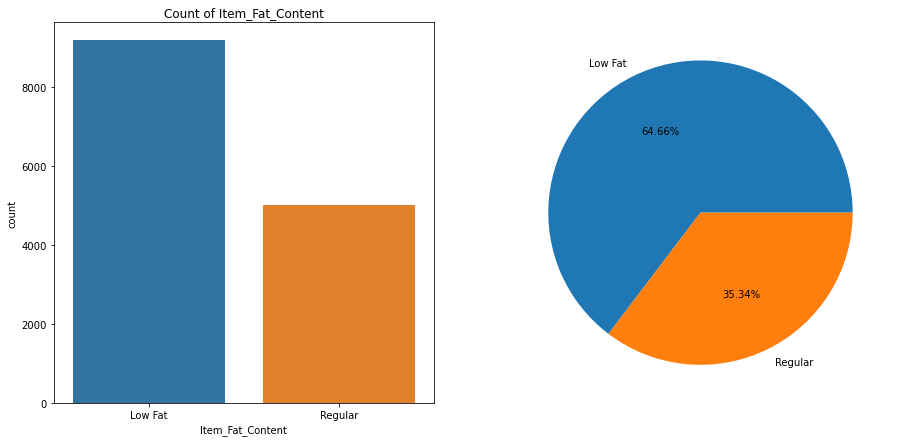

In [35]:
visual_of_cat('Item_Fat_Content')


## ***Interpretation:  The dataset indicates that 65% of items are low fat and about 35 are regular

## analysis of Item_Type

In [44]:
info_of_cat('Item_Type')

Unique values in Item_Type are: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
No of unique values Item_Type are 16
Mode of Item_Type is Fruits and Vegetables
Number of missing values in Item_Type is 0


### Visual presentation of  Item_Type attribute

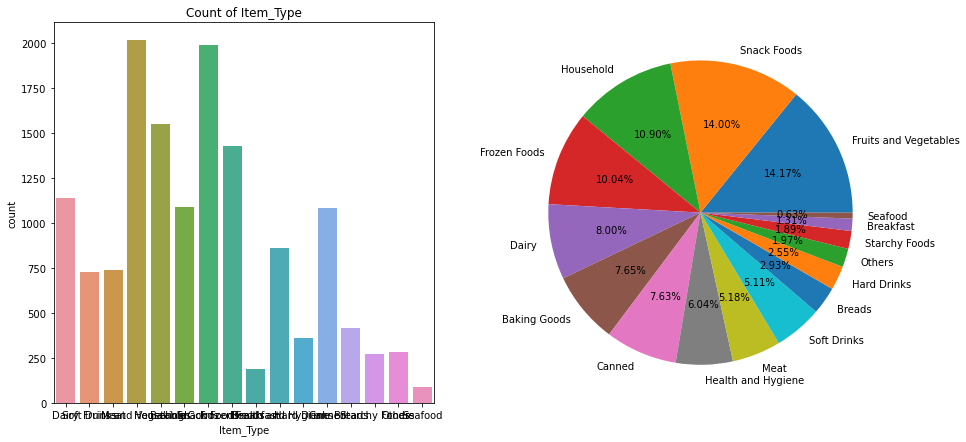

In [36]:
visual_of_cat('Item_Type')

## ***Interpretation:  The dataset indicates that fruits and vegetable and snack foods are the most frequent item type around 14%

## analysis of Item_Identifier

In [45]:
info_of_cat('Item_Identifier')

Unique values in Item_Identifier are: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
No of unique values Item_Identifier are 1559
Mode of Item_Identifier is DRA24
Number of missing values in Item_Identifier is 0


## ***Interpretation:  The dataset indicates that there are 1559 different items and most frequent item is DRA24

## analysis of Outlet_Identifier

In [37]:
info_of_cat('Outlet_Identifier')

Unique values in Outlet_Identifier are: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Mode of Outlet_Identifier is OUT027
Number of missing values in Outlet_Identifier is 0


### Visual presentation of Outlet_Identifier

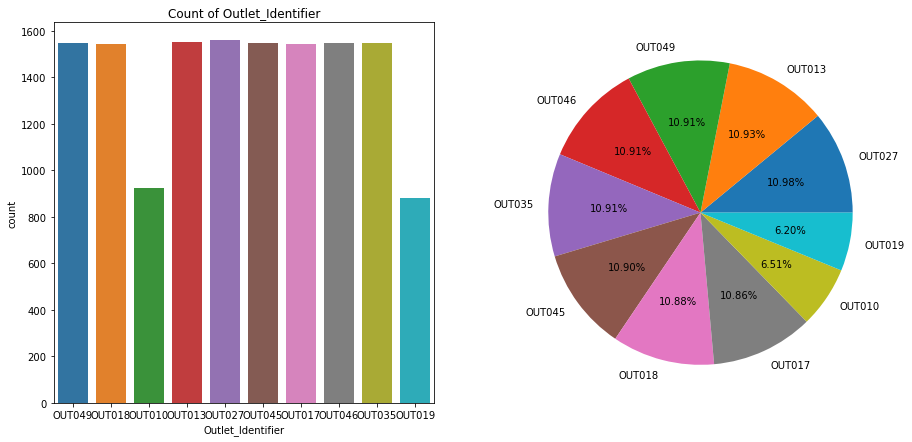

In [38]:
visual_of_cat('Outlet_Identifier')

## ***Interpretation:  The dataset indicates that there are 10 different outlets

## analysis of Outlet_Establishment_Year

In [47]:
info_of_cat('Outlet_Establishment_Year')

Unique values in Outlet_Establishment_Year are: [1999 2009 1998 1987 1985 2002 2007 1997 2004]
No of unique values Outlet_Establishment_Year are 9
Mode of Outlet_Establishment_Year is 1985
Number of missing values in Outlet_Establishment_Year is 0


### Visual presentation of Outlet_Establishment_Year

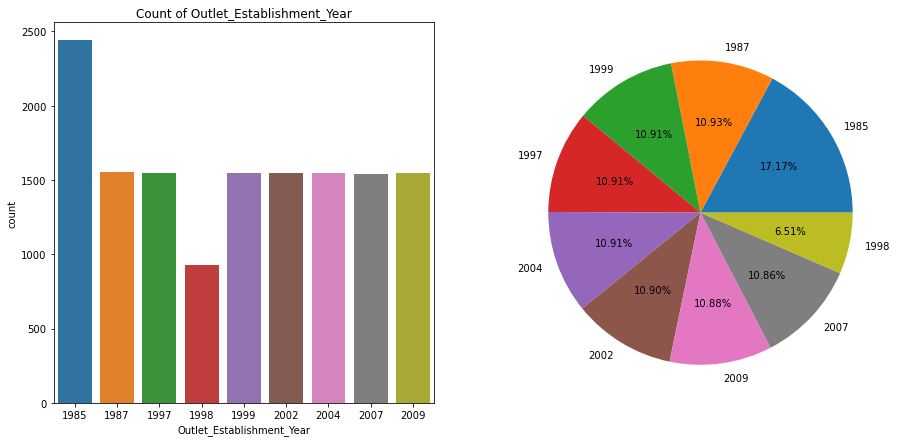

In [48]:
visual_of_cat('Outlet_Establishment_Year')

## ***Interpretation:  The dataset indicates that max stores were opened in 1985 and min in 1998

## analysis of Outlet_Size

In [49]:
info_of_cat('Outlet_Size')

Unique values in Outlet_Size are: ['Medium' 'High' 'Small']
No of unique values Outlet_Size are 3
Mode of Outlet_Size is Small
Number of missing values in Outlet_Size is 0


### Visual presentation of Outlet_Size

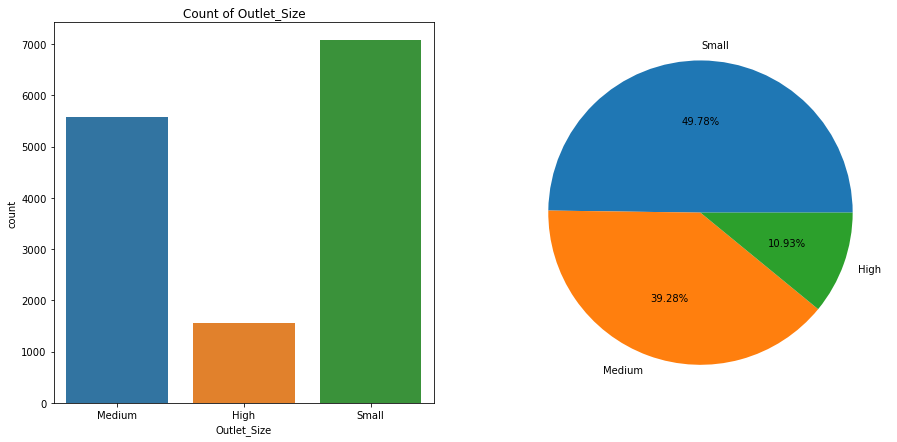

In [50]:
visual_of_cat('Outlet_Size')

## ***Interpretation:  The dataset indicates that most of the outlets are small about 50 % and min no are of high size about 11 %

## analysis of Outlet_Location_Type

In [51]:
info_of_cat('Outlet_Location_Type')

Unique values in Outlet_Location_Type are: ['Tier 1' 'Tier 3' 'Tier 2']
No of unique values Outlet_Location_Type are 3
Mode of Outlet_Location_Type is Tier 3
Number of missing values in Outlet_Location_Type is 0


### Visual presentation of Outlet_Location_Type

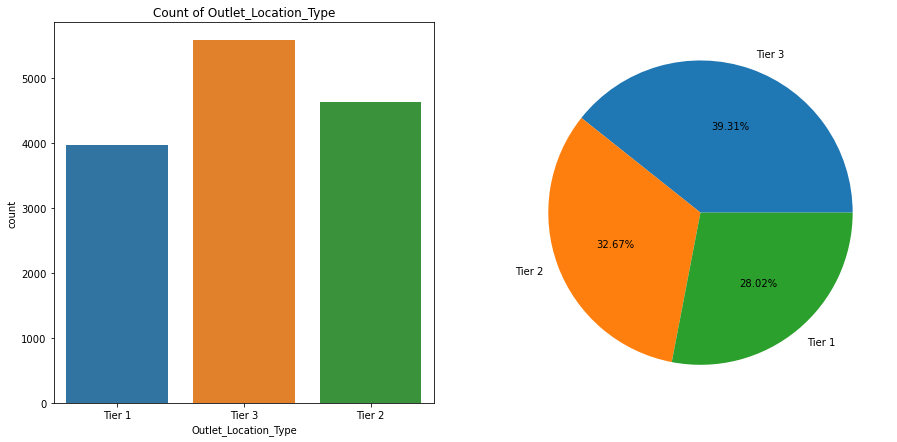

In [52]:
visual_of_cat('Outlet_Location_Type')

## ***Interpretation:  The dataset indicates that max outlets are in tier 3 cities about 39% and min outlets are in tier 1 cities about 28%

## analysis of Outlet_Type

In [53]:
info_of_cat('Outlet_Type')

Unique values in Outlet_Type are: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
No of unique values Outlet_Type are 4
Mode of Outlet_Type is Supermarket Type1
Number of missing values in Outlet_Type is 0


### Visual presentation of Outlet_Type

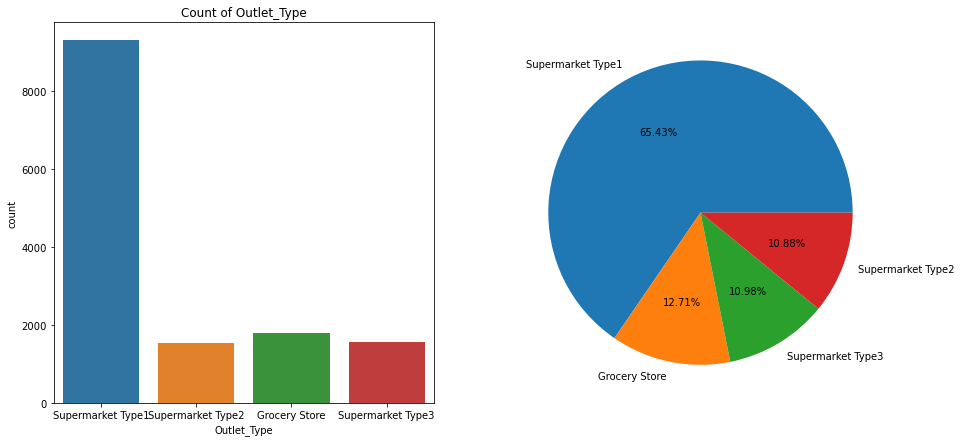

In [54]:
visual_of_cat('Outlet_Type')

## ***Interpretation:  The dataset indicates that max no of outlets are in supermarket type 1 about 65% and min are in supermarket type 2 and type 3 about 11%

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical \ Variables$$

LEVEL 1 Analysis of Numerical Columns
----------------------------------------------------------
Check if the data is discrete or continuous. \
Measure the central tendency (mean, median, mode) \
Measure the dispersion values \
Check for missing values \
Checking for skewness\
Check for outliers \
Think about how the missing values could be treated. \
Think about the kind of graph/chart that can be plotted using this data.

## User defined function for calculating mean, median, mode,  standard deviation, and count of all null values

In [55]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [58]:
def visual_of_num(col):
    fig, ax = plt.subplots(1, 2, figsize= (20, 7))            
    sns.histplot(x = df[col], ax =ax[1], color = "m") 
    sns.boxplot(x = df[col], ax = ax[0], color = "g") 
    plt.show()


In [56]:
continuous

['Item_Identifier',
 'Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Item_Outlet_Sales']

## analysis of Item_Weight

In [57]:
info_of_numerical('Item_Weight')

The mean of the Item_Weight is 12.793380385807628
The median of the Item_Weight is 12.6
The mode of the Item_Weight is 17.6
The standard deviation of the Item_Weight is 4.6517158036609825
Number of missing values in the Item_Weight is 0


### Visual presentation of Item_Weight

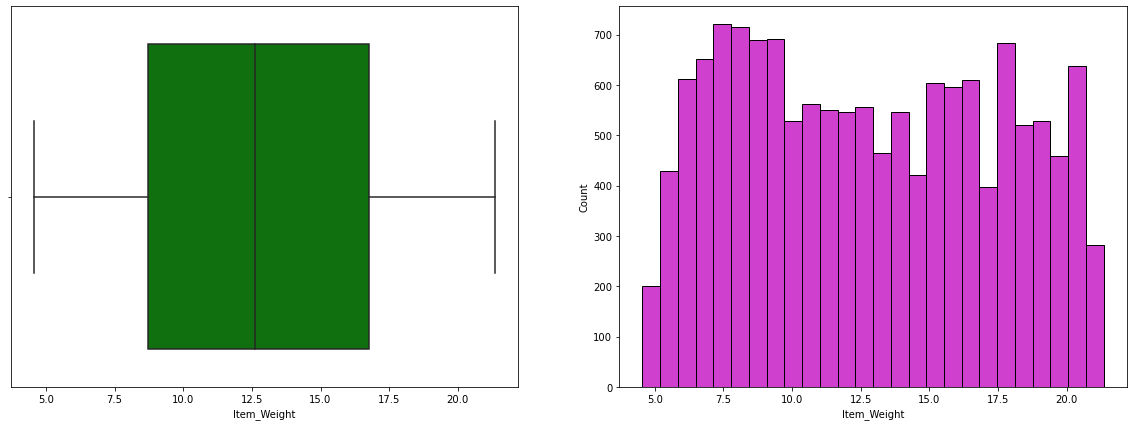

In [59]:
visual_of_num('Item_Weight')

## ***Interpretation:  The dataset indicates that there are no outliers in item weight and mojority of items are in range of 8 to 17

## analysis of Item_Visibility

In [61]:
info_of_numerical('Item_Visibility')

The mean of the Item_Visibility is 0.07030079341671354
The median of the Item_Visibility is 0.062347052
The mode of the Item_Visibility is 0.06470883
The standard deviation of the Item_Visibility is 0.048621198376929964
Number of missing values in the Item_Visibility is 0


### Visual presentation of Item_Visibility

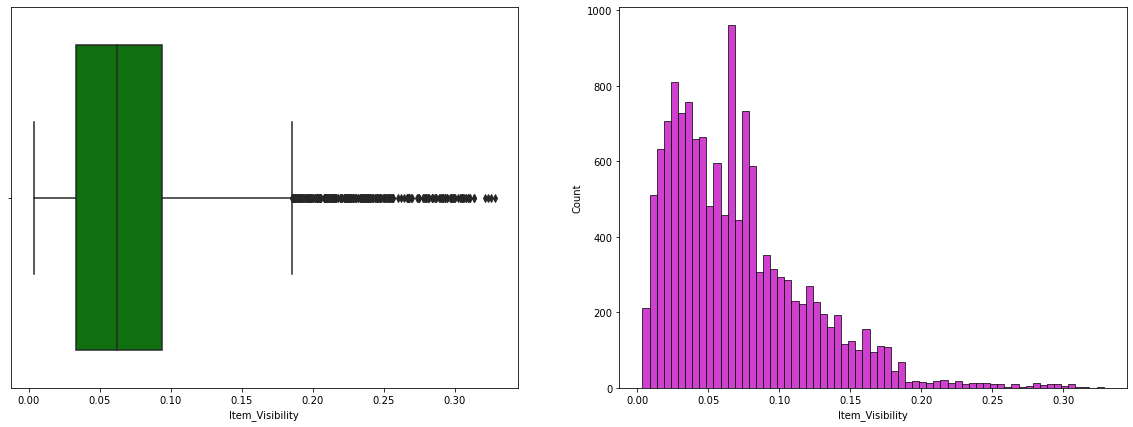

In [62]:
visual_of_num('Item_Visibility')

## ***Interpretation:  The dataset indicates that it is right skewed and most of the items are visible in range of 0.02 to 0.09

## analysis of Item_MRP

In [63]:
info_of_numerical('Item_MRP')

The mean of the Item_MRP is 141.00497725992656
The median of the Item_MRP is 142.247
The mode of the Item_MRP is 172.0422
The standard deviation of the Item_MRP is 62.086938014763994
Number of missing values in the Item_MRP is 0


### Visual presentation of Item_MRP

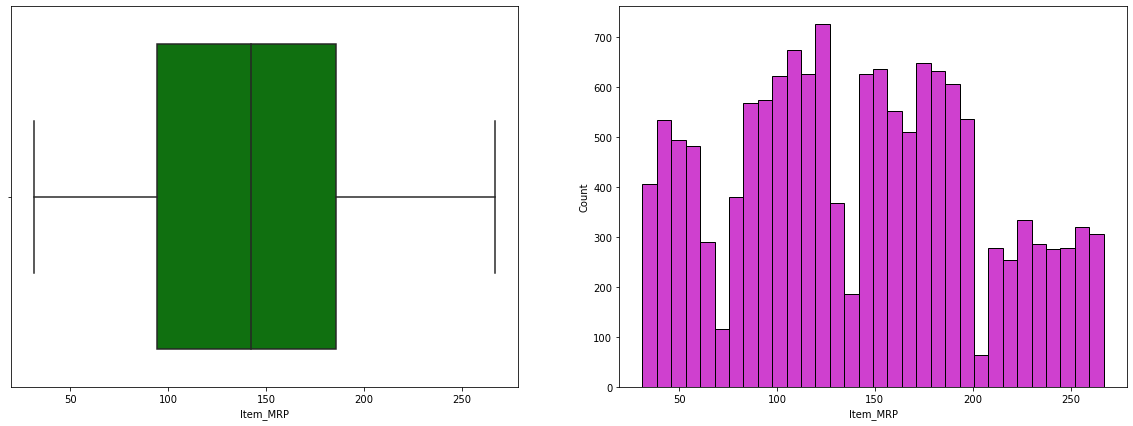

In [64]:
visual_of_num('Item_MRP')

## ***Interpretation:  The dataset indicates that there are no outliers in mrp and majority of items are in range of  100  to 180 dollars

## analysis of Item_Outlet_Sales

In [65]:
info_of_numerical('Item_Outlet_Sales')

The mean of the Item_Outlet_Sales is 2181.2889135750365
The median of the Item_Outlet_Sales is 1794.331
The mode of the Item_Outlet_Sales is 958.752
The standard deviation of the Item_Outlet_Sales is 1706.499615733832
Number of missing values in the Item_Outlet_Sales is 5681


### Visual presentation of Item_Outlet_Sales

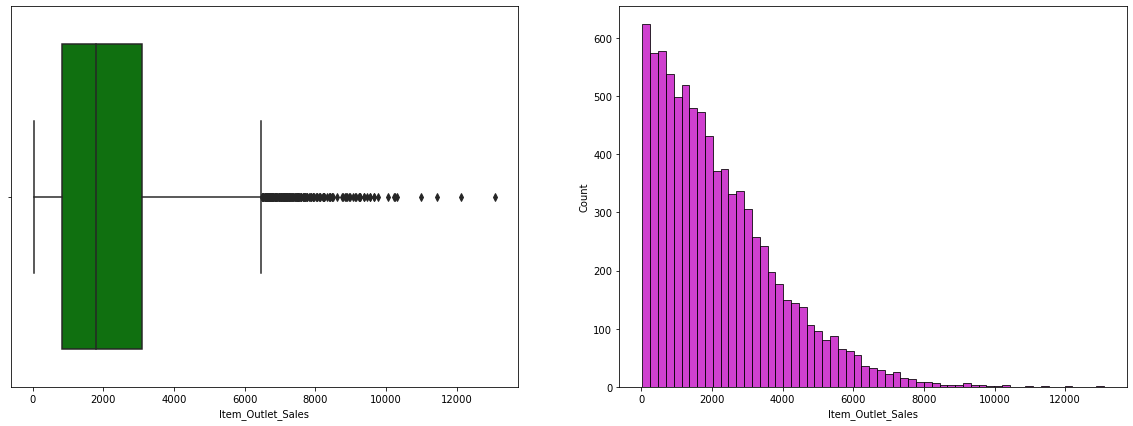

In [66]:
visual_of_num('Item_Outlet_Sales')

## ***Interpretation:  The dataset indicates that sales is right skewed and majority of sales are in range of 0 to 2000

# level 2 analysis

In [67]:
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical                continuous
-------------------------  -----------------
Item_Fat_Content           Item_Identifier
Item_Type                  Item_Weight
Outlet_Identifier          Item_Visibility
Outlet_Establishment_Year  Item_MRP
Outlet_Size                Item_Outlet_Sales
Outlet_Location_Type
Outlet_Type


## relationship of sales with item type

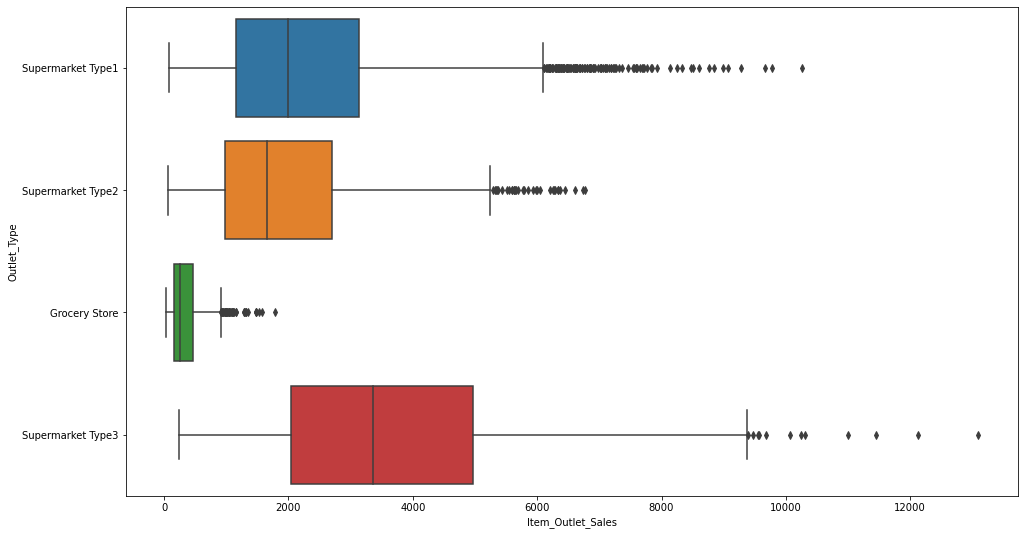

In [76]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.boxplot( x = "Item_Outlet_Sales",y= 'Outlet_Type', data = df)
plt.show()

## interpretation: as we can see grocery stores have lowest sales and supermarket typ3 has highest sales

# analysis of outlet size with outlet sales

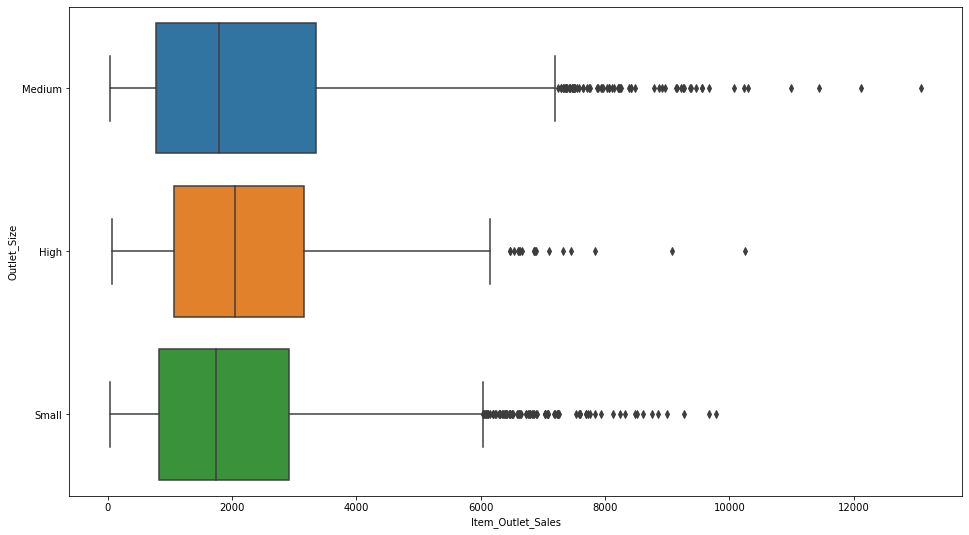

In [77]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.boxplot( x = "Item_Outlet_Sales",y= 'Outlet_Size', data = df)
plt.show()

## interpretation : all 3 sizes of outlets have similar sales

# analysis of outlet location with outlet sales

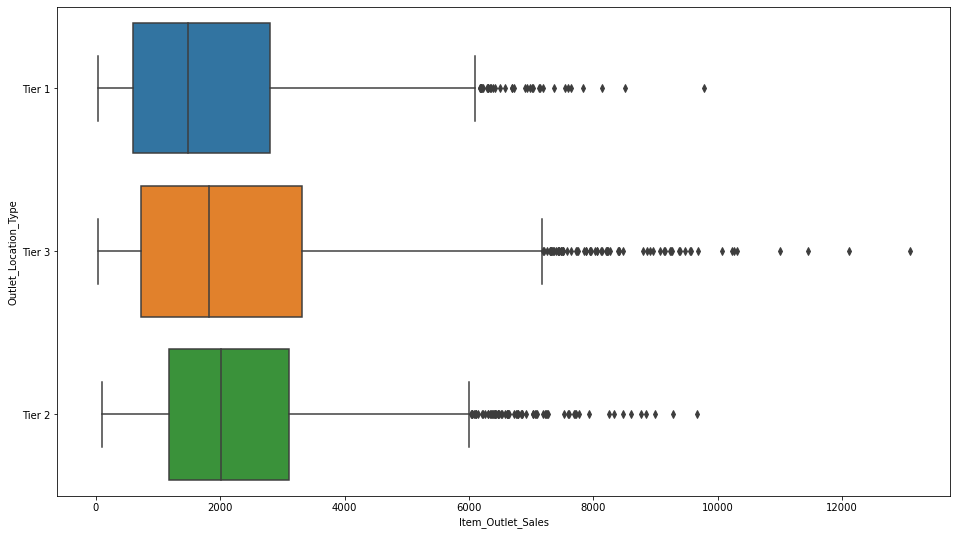

In [78]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.boxplot( x = "Item_Outlet_Sales",y= 'Outlet_Location_Type', data = df)
plt.show()

## interpretation: tier 3 cities have somewhat higher sales than other city types

# level 3 analysis

## analysis of Item_Outlet_Sales and Item_Visibility with different outlet type

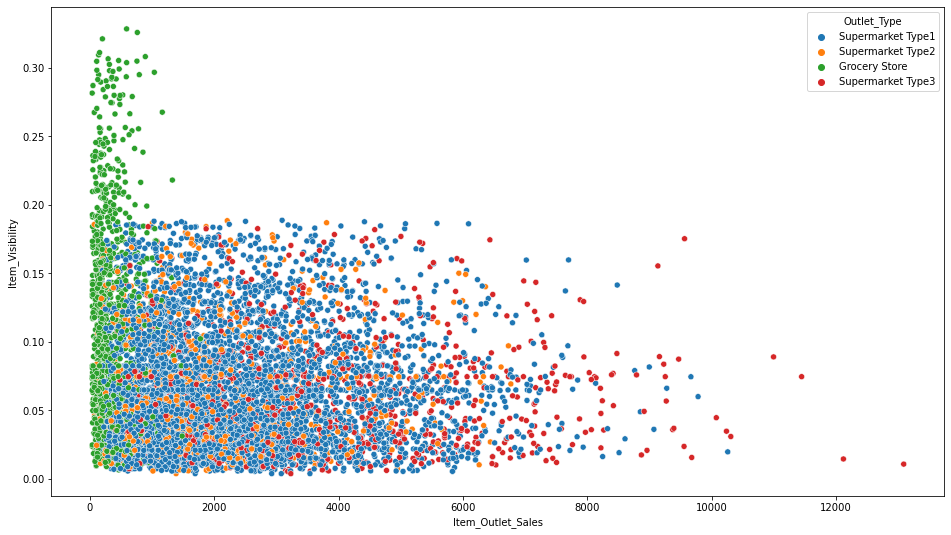

In [93]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=df['Item_Outlet_Sales'],y=df['Item_Visibility'],hue=df['Outlet_Type'],markers='o');

## interpretation: items in grocery shops have visibility but lowest sales

# feature engineering

In [97]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
dfc=df.copy()
dfc['Item_Identifier']=dfc['Item_Identifier'].astype('category')
dfc['Item_Fat_Content']=dfc['Item_Fat_Content'].astype('category')
dfc['Item_Type']=dfc['Item_Type'].astype('category')
dfc['Outlet_Identifier']=dfc['Outlet_Identifier'].astype('category')
dfc['Outlet_Size']=dfc['Outlet_Size'].astype('category')
dfc['Outlet_Location_Type']=dfc['Outlet_Location_Type'].astype('category')
dfc['Outlet_Type']=dfc['Outlet_Type'].astype('category')

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

## label encoding

In [6]:
encoder=LabelEncoder()
dfc['Item_Identifier']=encoder.fit_transform(dfc['Item_Identifier'])
dfc['Item_Fat_Content']=encoder.fit_transform(dfc['Item_Fat_Content'])
dfc['Item_Type']=encoder.fit_transform(dfc['Item_Type'])
dfc['Outlet_Identifier']=encoder.fit_transform(dfc['Outlet_Identifier'])
dfc['Outlet_Size']=encoder.fit_transform(dfc['Outlet_Size'])
dfc['Outlet_Location_Type']=encoder.fit_transform(dfc['Outlet_Location_Type'])
dfc['Outlet_Type']=encoder.fit_transform(dfc['Outlet_Type'])

In [7]:
dfc.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

## feature selection

In [8]:
corr=dfc.corr()
corr.style.background_gradient(cmap='coolwarm')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.050768,-0.111079,-0.040769,-0.012048,0.010743,-0.001089,-0.002954,0.002209,-0.002473,-0.004532,0.002869
Item_Weight,0.050768,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.003002,0.000247,0.000944,-0.001719,0.001913,0.013261
Item_Fat_Content,-0.111079,-0.033737,1.000000,0.048315,-0.147733,-0.004019,-0.001095,0.000137,-0.000827,0.001373,-0.000228,0.018719
Item_Visibility,-0.040769,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.108731,-0.090833,0.026808,-0.020550,-0.172744,-0.135247
Item_Type,-0.012048,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.001126,0.003061,-0.001080,0.002083,0.004305,0.017048
Item_MRP,0.010743,0.035751,-0.004019,-0.009144,0.043948,1.000000,-0.000555,0.000141,-0.001305,0.000838,0.000136,0.567574
Outlet_Identifier,-0.001089,0.003002,-0.001095,-0.108731,0.001126,-0.000555,1.000000,0.079047,0.423623,-0.716151,0.099899,0.162325
Outlet_Establishment_Year,-0.002954,0.000247,0.000137,-0.090833,0.003061,0.000141,0.079047,1.000000,0.428387,-0.089328,-0.122519,-0.049135
Outlet_Size,0.002209,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.423623,0.428387,1.000000,-0.590677,-0.260496,-0.060517
Outlet_Location_Type,-0.002473,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.716151,-0.089328,-0.590677,1.000000,0.467251,0.089367


## since there are only 3 4  correlated columns having corr value greater than 0.01 with target variable Item_Outlet_Sales, therefore we have taken all the features for model building

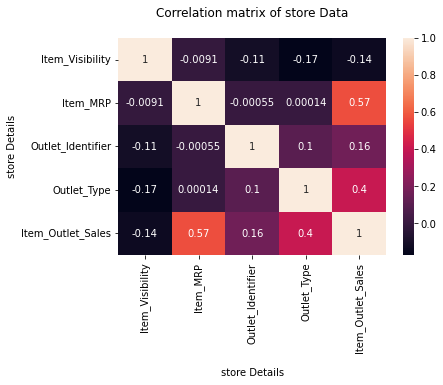

In [31]:
new_df=dfc[['Item_Visibility','Item_MRP','Outlet_Identifier','Outlet_Type','Item_Outlet_Sales']]
hm = sns.heatmap(new_df.corr(), annot = True)
hm.set(xlabel='\nstore Details', ylabel='store Details', title = "Correlation matrix of store Data\n")
plt.show()

# train test split

### taking out validation data

In [9]:
df_val=dfc[dfc['Item_Outlet_Sales'].isnull()]
df_val

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,1114,20.750,0,0.007565,13,107.8622,9,1999,1,0,1,NaN
8524,1078,8.300,1,0.038428,4,87.3198,2,2007,2,1,1,NaN
8525,1420,14.600,0,0.099575,11,241.7538,0,1998,1,2,0,NaN
8526,817,7.315,0,0.015388,13,155.0340,2,2007,2,1,1,NaN
8527,1197,13.600,1,0.118599,4,234.2300,5,1985,1,2,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.500,1,0.013496,13,141.3154,8,1997,2,0,1,NaN
14200,308,7.600,1,0.142991,15,169.1448,3,2009,1,2,2,NaN
14201,1426,10.000,0,0.073529,8,118.7440,7,2002,2,1,1,NaN
14202,521,15.300,1,0.064709,3,214.6218,2,2007,2,1,1,NaN


In [10]:
X_val=df_val.drop('Item_Outlet_Sales',axis=1)
X_val

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8523,1114,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
8524,1078,8.300,1,0.038428,4,87.3198,2,2007,2,1,1
8525,1420,14.600,0,0.099575,11,241.7538,0,1998,1,2,0
8526,817,7.315,0,0.015388,13,155.0340,2,2007,2,1,1
8527,1197,13.600,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.500,1,0.013496,13,141.3154,8,1997,2,0,1
14200,308,7.600,1,0.142991,15,169.1448,3,2009,1,2,2
14201,1426,10.000,0,0.073529,8,118.7440,7,2002,2,1,1
14202,521,15.300,1,0.064709,3,214.6218,2,2007,2,1,1


In [11]:
df_train_test=dfc[dfc['Item_Outlet_Sales'].notnull()]
df_train_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [12]:
X=df_train_test.drop('Item_Outlet_Sales',axis=1)
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.074402,6,182.0950,0,1998,1,2,0
4,1297,8.930,0,0.064299,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [13]:
y=df_train_test['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((5966, 11), (2557, 11), (5966,), (2557,))

# scaling

In [15]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# linear regression model

In [16]:
from sklearn.linear_model import LinearRegression

In [33]:
lr_model=LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

In [34]:
lr_y_pred=lr_model.predict(X_test)
lr_y_pred

array([1404.00125087, 3139.32294609,  461.41951895, ..., 3101.89766298,
       2237.63911714, 2141.33334966])

In [35]:
print('Intercept: \n', lr_model.intercept_)
print('Coefficients: \n', lr_model.coef_)
r_sq2 = lr_model.score(X_train,y_train)
print('coefficient of determination:', r_sq2)

Intercept: 
 2191.807350452565
Coefficients: 
 [ -2.69237228 -11.14256561  19.27622874 -73.25277818  -6.55728291
 978.68946549 148.45869398 -16.3506648  -33.63022289 -87.41344087
 686.49602305]
coefficient of determination: 0.5019927782043034


In [47]:
from sklearn.metrics import r2_score

print('r2 score',r2_score(y_test,lr_y_pred))
lr_r2_score=r2_score(y_test,lr_y_pred)

r2 score 0.5022281347186679


In [48]:
results=[]
names=[]

In [49]:
results.append(lr_r2_score)
names.append('linear regression')

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [178]:
MAE=round(mean_absolute_error(y_test,lr_y_pred),2)
MSE=round(mean_squared_error(y_test, lr_y_pred),2)
RMSE = np.sqrt(MSE)
print(MAE,MSE, RMSE)

897.87 1435445.73 1198.1008847338358


## rmse is very large therefore this model is not suitable

# ridgecv model

In [50]:
from sklearn.linear_model import RidgeCV

In [51]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error') # alpha * summation of beta**2

In [52]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [53]:
ridge_cv_model.alpha_

10.0

In [54]:
test_predictions = ridge_cv_model.predict(X_test)

In [43]:
ridge_cv_model.coef_

array([ -2.66361955, -11.08723513,  19.30024073, -73.36777741,
        -6.5008625 , 977.02664719, 150.7889027 , -16.77208593,
       -33.10477636, -83.96732228, 683.57182903])

In [55]:
ridge_r2_score=r2_score(y_test,test_predictions)
print('r2 score',r2_score(y_test,test_predictions))

r2 score 0.502295016830888


In [56]:
results.append(ridge_r2_score)
names.append('ridge_cv')

In [24]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
print(MAE,MSE, RMSE)

897.7333343602068 1435252.8606642373 1198.0203924242014


## here also r2 value is less and rmse is very large therefore we will not consider this model

# decision tree regressor model

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree
from sklearn.model_selection import KFold

In [58]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

## tuning hyperparameters with kfold=10

In [59]:
kf = KFold(n_splits=10, shuffle=True, random_state=20)
max_depth = [1,2,3,4,5,6,7,8,9,10]
max_leaf_nodes=[10,11,12,13,14,15,16,17,18]
for val in max_depth:
    for j in max_leaf_nodes:
        
        score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val,max_leaf_nodes=j, random_state= 20), X, y, cv= kf, scoring="neg_mean_squared_error")
        print(f'For max depth: {val},for max leaf node :{j}')
        rmse(score.mean())

For max depth: 1,for max leaf node :10
rmse= 1492.14
For max depth: 1,for max leaf node :11
rmse= 1492.14
For max depth: 1,for max leaf node :12
rmse= 1492.14
For max depth: 1,for max leaf node :13
rmse= 1492.14
For max depth: 1,for max leaf node :14
rmse= 1492.14
For max depth: 1,for max leaf node :15
rmse= 1492.14
For max depth: 1,for max leaf node :16
rmse= 1492.14
For max depth: 1,for max leaf node :17
rmse= 1492.14
For max depth: 1,for max leaf node :18
rmse= 1492.14
For max depth: 2,for max leaf node :10
rmse= 1286.40
For max depth: 2,for max leaf node :11
rmse= 1286.40
For max depth: 2,for max leaf node :12
rmse= 1286.40
For max depth: 2,for max leaf node :13
rmse= 1286.40
For max depth: 2,for max leaf node :14
rmse= 1286.40
For max depth: 2,for max leaf node :15
rmse= 1286.40
For max depth: 2,for max leaf node :16
rmse= 1286.40
For max depth: 2,for max leaf node :17
rmse= 1286.40
For max depth: 2,for max leaf node :18
rmse= 1286.40
For max depth: 3,for max leaf node :10
rmse= 1

### max depth 5 and max leaf node 18

In [60]:
dtr_model=DecisionTreeRegressor(max_depth=5,min_samples_split=5,max_leaf_nodes=18)
dtr_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=18, min_samples_split=5)

In [61]:
dtr_y_pred=dtr_model.predict(X_test)

In [62]:
print("R-Squared on train dataset :",round(dtr_model.score(X_train,y_train),3))

R-Squared on train dataset : 0.606


In [63]:
dtr_r2_score=r2_score(y_test,dtr_y_pred)
print('r2 score',r2_score(y_test,dtr_y_pred))

r2 score 0.5927354672906016


In [64]:
results.append(dtr_r2_score)
names.append('decision tree regressor')

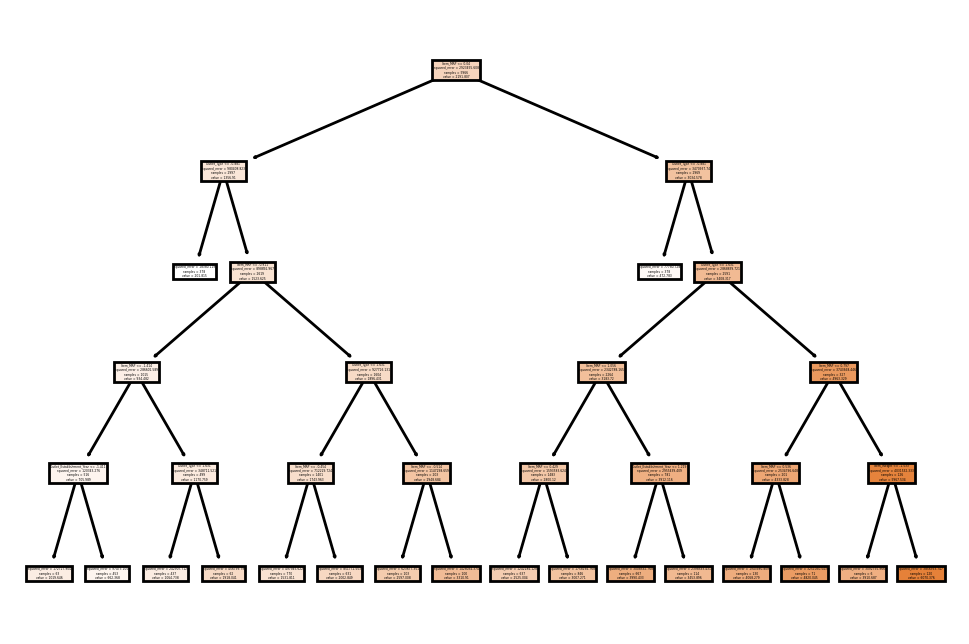

In [202]:
fig, axes = plt.subplots(dpi=200)
tree.plot_tree(dtr_model,filled = True,feature_names=X.columns);

# random forest regressor model with bagging

In [66]:

from sklearn.ensemble import RandomForestRegressor

In [67]:
rfr_model = RandomForestRegressor()

cv1 = KFold(n_splits=10,random_state=None,shuffle=False)
R2_score1 = cross_val_score(rfr_model,X,y,scoring='r2',cv=cv1,n_jobs=-1,error_score='raise')
results.append(R2_score1)
names.append('Random forest')

print("r2 value :",R2_score1.mean())

r2 value : 0.5523506998636691


# boosting

In [68]:
from sklearn.ensemble import AdaBoostRegressor

In [69]:
boosted_model = AdaBoostRegressor()


cv1 = KFold(n_splits=10,random_state=None,shuffle=False)
RF_score = cross_val_score(boosted_model,X,y,scoring='r2',cv=cv1,n_jobs=-1,error_score='raise')
results.append(RF_score)
names.append('Adaboost')

print("r2 value :",RF_score.mean())

r2 value : 0.4491575050960651


# stacking

In [70]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingRegressor
from numpy import mean
from numpy import std

In [71]:
def get_stacking():
    
    
    level0 = list()
    
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    
    
    level1 = RandomForestRegressor()
    
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=10)
    return model

In [72]:
stacked_model= get_stacking()

cv = KFold(n_splits=10, shuffle=False, random_state=None)
n_scores = cross_val_score(stacked_model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
results.append(n_scores)
names.append('stacking')
                           

print('r-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

r-Score: 0.406 (0.026)


# comparing all models

## box plot is showing r2 score for various models

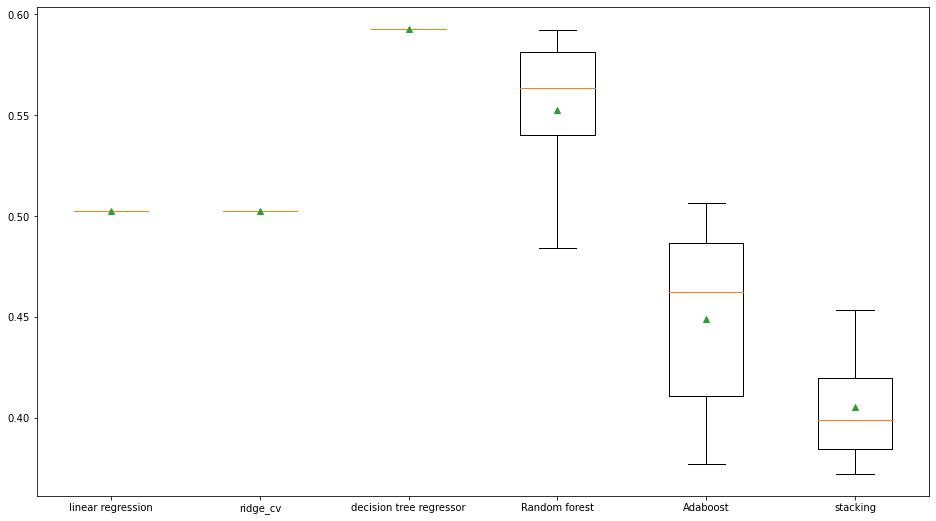

In [74]:
import matplotlib.pyplot as pt
pt.figure(figsize=(16,9))
pt.boxplot(results, labels=names, showmeans=True)
pt.show()

# as r2 score of decision tree regressor is 0.59 in test data  which is greater than 
### random forest having mean r2 score of 0.55 
### adaboost with mean r2 score of 0.45
### stacking with mean r2 score of 0.40
### linear regression with r2 score of 0.50
### ridgecv with r2 score of 0.50
# therefore

# decision tree regressor is best

### predicting using validation data

In [236]:
X_val=scaler.transform(X_val)

In [237]:
dtr_model.predict(X_val)

array([1531.81124805, 1531.81124805,  472.7831709 , ..., 2002.84879746,
       3990.43287106, 1064.73760915])